# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [9]:
using Clustering, CSV, DataFrames, Gadfly

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [4]:
k=15
X=Matrix(data[:,1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [5]:
result=kmeans(X,k)

KmeansResult{Array{Float64,2},Float64,Int64}([797969.175925926 167856.14071856288 … 864695.8415841584 611744.756097561; 321884.0925925926 347812.7155688623 … 167997.36633663366 483356.4146341463], [15, 15, 15, 15, 15, 15, 15, 15, 15, 15  …  6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [7.31560501379248e9, 8.493277400597412e9, 8.709780756329102e9, 4.683186004255859e9, 1.612086740425586e10, 6.069402756841309e9, 4.832043515719238e9, 8.371134236231445e9, 2.7993041428413086e9, 8.372858212402344e9  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [324, 334, 315, 321, 340, 352, 328, 352, 354, 346, 125, 351, 341, 202, 615], [324, 334, 315, 321, 340, 352, 328, 352, 354, 346, 125, 351, 341, 202, 615], 1.3572369502043924e13, 11, true)

In [6]:
data[!, :cluster] = string.(assignments(result));

In [7]:
result.centers

2×15 Array{Float64,2}:
 797969.0  167856.0  418183.0  822689.0  …  244655.0  864696.0  611745.0
 321884.0  347813.0  786582.0  730559.0     847642.0  167997.0  483356.0

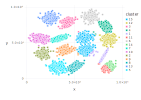

In [10]:
plot(data, x="x", y="y", color="cluster", Geom.point)

In [ ]:
n = nrow(data)
D = zeros(n, n)
for i = 1:n
    a = Vector{Float64}(data[i, 1:2])
    for j = 1:n
        b = Vector{Float64}(data[j, 1:2])
        D[i, j] = euclidean(a, b)
    end
end